In [2]:
import cv2 

img = cv2.imread(r'C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28\asalto\1.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

28 28 3 3


# Convolutional Neural Networks

# Importar Librerías

In [7]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [8]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [10]:
dirname = os.path.join(os.getcwd(), r'C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28')
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28\
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28\asalto 1
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28\incendio 6709
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28\inundaciones 9389
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28\robo 5240
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\situationsimages28x28\tornados 8765
Directorios leidos: 5
Imagenes en cada directorio [6710, 9389, 5240, 8765, 8435]
suma Total de imagenes en su

# Creamos las etiquetas

In [14]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  38539


In [15]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 asalto
1 incendio
2 inundaciones
3 robo
4 tornados


In [16]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [18]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (30831, 28, 28, 3) (30831,)
Testing data shape :  (7708, 28, 28, 3) (7708,)


Text(0.5, 1.0, 'Ground Truth : 4')

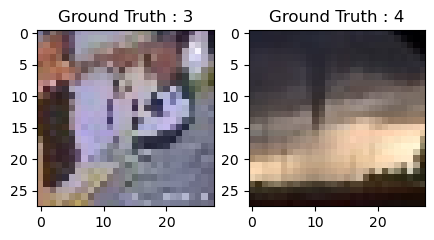

In [24]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

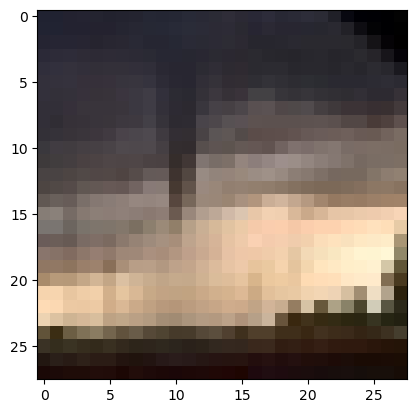

In [26]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [28]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [30]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [31]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(24664, 28, 28, 3) (6167, 28, 28, 3) (24664, 5) (6167, 5)


# Creamos el modelo de CNN

In [33]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [34]:
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU, Input

sport_model = Sequential()
#sport_model.add(Input(shape=(21, 28, 3)))  # Add Input layer with the specified input shape
sport_model.add(Input(shape=(28, 28, 3)))  # Add Input layer with the specified input shape
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(negative_slope=0.1)) # Replace alpha with negative_slope
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(negative_slope=0.1)) # Replace alpha with negative_slope
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))


In [35]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,797 (788.27 KB)

 Trainable params: 201,797 (788.27 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#OLD1 #sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
#OLD2 #sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100), metrics=['accuracy'])
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR), metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [38]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2942 - loss: 1.5632 - val_accuracy: 0.7242 - val_loss: 1.2786
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4966 - loss: 1.3021 - val_accuracy: 0.7626 - val_loss: 0.9952
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6071 - loss: 1.0714 - val_accuracy: 0.8049 - val_loss: 0.8035
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6597 - loss: 0.9286 - val_accuracy: 0.8215 - val_loss: 0.6906
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7030 - loss: 0.8283 - val_accuracy: 0.8547 - val_loss: 0.6066
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7298 - loss: 0.7560 - val_accuracy: 0.8625 - val_loss: 0.5501
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7547 - loss: 0.7030 - val_accuracy: 0.8800 - val_loss: 0.5031
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7666 - loss: 0.6592 - val_accuracy: 

In [39]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
#sport_model.save(r"C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Red Neuronal Entrenada\entrenadita.h5")

# Save the model in the native Keras format
sport_model.save(r"C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Red Neuronal Entrenada\trainedCNNv2.keras")


# Evaluamos la red

In [52]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9326 - loss: 0.2742


In [53]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.27281704545021057
Test accuracy: 0.9333160519599915


In [54]:
sport_train.history

{'accuracy': [0.3644988536834717,
  0.5298410654067993,
  0.6221213340759277,
  0.6688696146011353,
  0.7079549431800842,
  0.7346334457397461,
  0.7582306265830994,
  0.7712860703468323,
  0.7893285751342773,
  0.8036409616470337,
  0.8153989911079407,
  0.8223726749420166,
  0.8360363245010376,
  0.8421991467475891,
  0.8500243425369263,
  0.8521732091903687,
  0.8611741662025452,
  0.864215075969696,
  0.8685128092765808,
  0.8739053010940552],
 'loss': [1.4943687915802002,
  1.2383729219436646,
  1.0326515436172485,
  0.9050238132476807,
  0.8104513883590698,
  0.742953896522522,
  0.6921631693840027,
  0.6511870622634888,
  0.6150850057601929,
  0.577674388885498,
  0.5563991069793701,
  0.533909797668457,
  0.5115061402320862,
  0.49619293212890625,
  0.47525128722190857,
  0.46430858969688416,
  0.44571882486343384,
  0.44004273414611816,
  0.4243066906929016,
  0.41620194911956787],
 'val_accuracy': [0.7241770625114441,
  0.7626074552536011,
  0.8049294352531433,
  0.8214691281

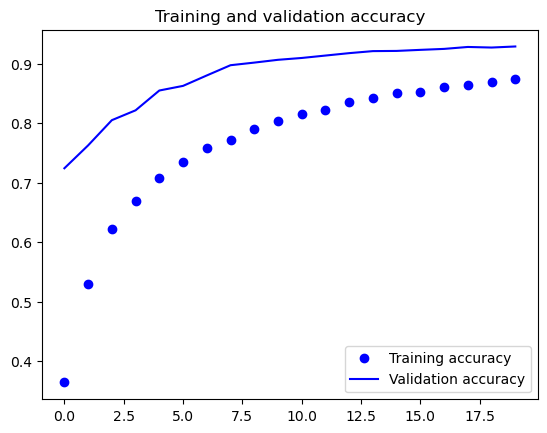

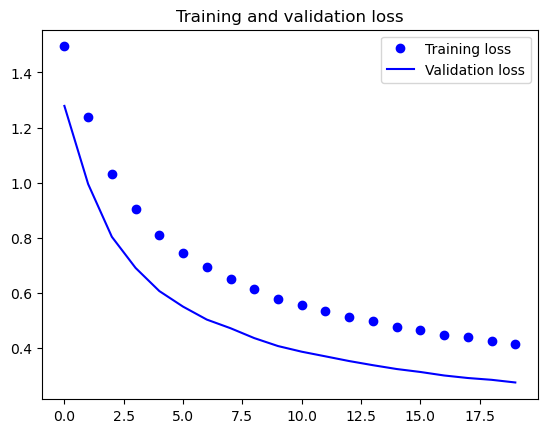

In [55]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
predicted_classes2 = sport_model.predict(test_X)

241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [57]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [58]:
predicted_classes.shape, test_Y.shape

((7708,), (7708,))

# Aprendamos de los errores: Qué mejorar

Found 7194 correct labels


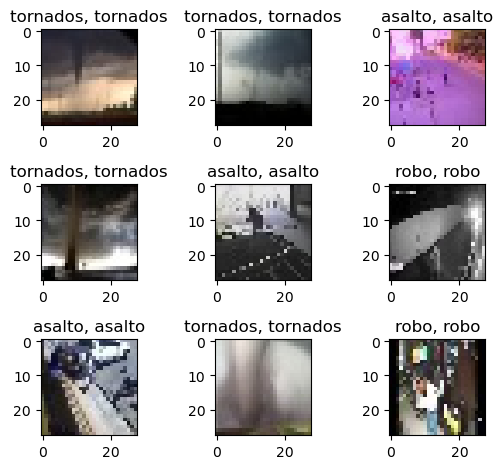

In [60]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none') #CAMBIAR
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 514 incorrect labels


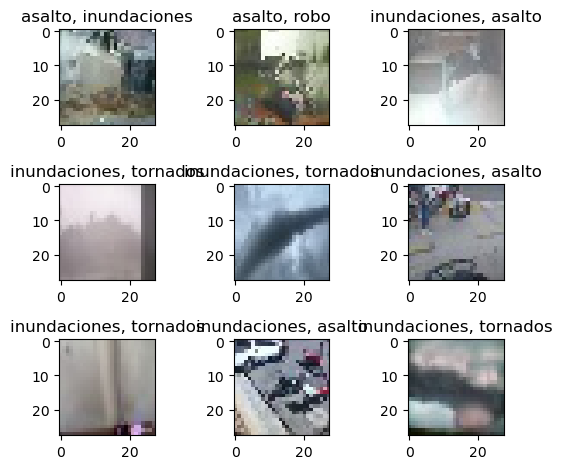

In [61]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')  #CAMBIAR
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [62]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

#nos da la precision de cada clase, algunos esta alto y otros bajos, puede ser porque se tienen pocos ejemplos de ciertas situaciones. 

              precision    recall  f1-score   support

     Class 0       0.88      0.90      0.89      1341
     Class 1       0.99      0.99      0.99      1898
     Class 2       0.80      0.88      0.84      1054
     Class 3       0.96      0.95      0.95      1751
     Class 4       0.98      0.91      0.94      1664

    accuracy                           0.93      7708
   macro avg       0.92      0.93      0.92      7708
weighted avg       0.94      0.93      0.93      7708



In [63]:
#ASALTO
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [r'C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\asalto\img1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR TIENEN Q COINCIDIR CON EL TAMAÑO DE PIXELES.
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
 
predicted_classes = sport_model.predict(test_X) #MODELO, no se carga archivo .h5 .keras, agarra IMG, de las que no tiene y retorna clase a la que pertenece.

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\asalto\img1.jpg asalto


In [76]:
#INCENDIO
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [r'C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\incendio\img1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR TIENEN Q COINCIDIR CON EL TAMAÑO DE PIXELES.
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
 
predicted_classes = sport_model.predict(test_X) #MODELO, no se carga archivo .h5 .keras, agarra IMG, de las que no tiene y retorna clase a la que pertenece.

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\incendio\img1.jpg incendio


In [78]:
#INUNDACIONES
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [r'C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\inundaciones\img1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR TIENEN Q COINCIDIR CON EL TAMAÑO DE PIXELES.
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
 
predicted_classes = sport_model.predict(test_X) #MODELO, no se carga archivo .h5 .keras, agarra IMG, de las que no tiene y retorna clase a la que pertenece.

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\inundaciones\img1.jpg inundaciones


In [94]:
#ROBO A CASA
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [r'C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\robo\img4.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR TIENEN Q COINCIDIR CON EL TAMAÑO DE PIXELES.
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
 
predicted_classes = sport_model.predict(test_X) #MODELO, no se carga archivo .h5 .keras, agarra IMG, de las que no tiene y retorna clase a la que pertenece.

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\robo\img4.jpg asalto


In [82]:
#TORNADO
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = [r'C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\tornados\img1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR TIENEN Q COINCIDIR CON EL TAMAÑO DE PIXELES.
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
 
predicted_classes = sport_model.predict(test_X) #MODELO, no se carga archivo .h5 .keras, agarra IMG, de las que no tiene y retorna clase a la que pertenece.

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Testing Red - Fotos\tornados\img1.jpg tornados
